In [229]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from xgboost import XGBClassifier

import itertools


In [230]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
# TODO: finish this one
differentiate_confusion_matrix_over = {
    'was_screened': [
        ([0], lambda df: isin_filter(df, 'was_screened', [0])), 
        ([1], lambda df: isin_filter(df, 'was_screened', [1]))
    ], 
    'ovar_histtype': [
        ([2], lambda df: isin_filter(df, 'ovar_histtype', [2])), 
        ([2, 4, 6, 8, 9, 31], lambda df: isin_filter(df, 'ovar_histtype', [2, 4, 6, 8, 9, 31]))
    ]
}


In [231]:
classifiers = {
    # 'LogisticRegression': LogisticRegression(C= 0.25, random_state= 0),
    # 'GaussianNB': GaussianNB(var_smoothing= 1e-09),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy'),
    # 'RandomForestClassifier': RandomForestClassifier(criterion= 'entropy', n_estimators= 200),
    'XGBClassifier': XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
}

experiment_data_helpers: List[ExperimentDataHelper] = [
    # ExperimentDataHelperScreenedOrCancer,
    ExperimentDataHelperScreened,
    ExperimentDataHelperNotScreenedCols,
    ExperimentDataHelperScreenedCols,
    ExperimentDataHelperAll,
    # ExperimentDataHelperSingleLabelScreenedOrCancer,
    # ExperimentDataHelperSingleLabelScreened,
    # ExperimentDataHelperSingleLabelNotScreenedCols,
    # ExperimentDataHelperSingleLabelScreenedCols,
    # ExperimentDataHelperSingleLabelAll
]

In [232]:
experiment_names = []
years = [1]
num_folds=10
for classifier_name, classifier in classifiers.items():
    for year in years:
        for experiment_data_helper_class in experiment_data_helpers:
            label = f'cancer_in_next_{year}_years'
            filesuffix = f'experiment_{experiment_data_helper_class.get_name()}_{classifier_name}_for_{label}_{num_folds}_trials'
            experiment_names.append(filesuffix)

In [233]:
experiment_names

['experiment_participants_screened_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_not_screened_cols_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_screened_cols_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_all_XGBClassifier_for_cancer_in_next_1_years_10_trials']

In [235]:
filesuffix = 'experiment_not_screened_cols_XGBClassifier_for_cancer_in_next_1_years_10_trials'

In [236]:
# TODO: feature_importance]
for experiment_name in experiment_names:
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(experiment_name)
    # cv_analytics_util.store_cv_results()
    



Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999259  | 0.000217293 | 0.998939   | 0.999644  |
| recall__class_0    | 0.961681  | 0.00537762  | 0.953206   | 0.970458  |
| f1-score__class_0  | 0.980103  | 0.00275349  | 0.975873   | 0.984704  |
| precision__class_1 | 0.0109348 | 0.0042659   | 0.00504626 | 0.0177187 |
| recall__class_1    | 0.36973   | 0.121842    | 0.24       | 0.608696  |
| f1-score__class_1  | 0.021192  | 0.00813739  | 0.00990917 | 0.0338266 |
| accuracy           | 0.961011  | 0.00529116  | 0.952907   | 0.969884  |
| auc                | 0.870525  | 0.0339433   | 0.804616   | 0.921383  |
+--------------------+-----------+-------------+------------+-----------+


PermissionError: [Errno 13] Permission denied: './feature_importance/feature_importance_mean__for_experiment_participants_screened_XGBClassifier_cancer_in_next_1_years__10_trials.csv'



Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999327   | 0.000161727 | 0.998975   | 0.999571   |
| recall__class_0    | 0.876305   | 0.00876274  | 0.857456   | 0.890257   |
| f1-score__class_0  | 0.93376    | 0.00499075  | 0.92302    | 0.941662   |
| precision__class_1 | 0.00558499 | 0.000731624 | 0.00437956 | 0.00704101 |
| recall__class_1    | 0.543528   | 0.0677409   | 0.441558   | 0.647059   |
| f1-score__class_1  | 0.0110547  | 0.00144151  | 0.00869187 | 0.01393    |
| accuracy           | 0.875874   | 0.00874926  | 0.857134   | 0.889813   |
| auc                | 0.831699   | 0.0224279   | 0.796265   | 0.866462   |
+--------------------+------------+-------------+------------+------------+


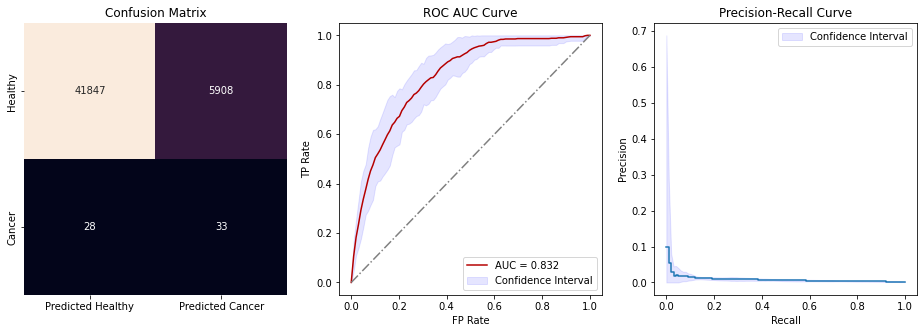

In [ ]:

cv_analytics_util = load_cv_analytics_util_see_stats(filesuffix)

In [ ]:
cv_analytics_util.analytics_utils[0].data_util.train_df.columns

Index(['plco_id', 'age', 'agelevel', 'arthrit_f', 'asp', 'asppd', 'bbd',
       'bcontr_f', 'bcontra', 'bcontrt',
       ...
       'thorm', 'trypreg', 'tubal', 'tuballig', 'usound_history',
       'uterine_fib', 'was_screened', 'weight20_f', 'weight50_f', 'weight_f'],
      dtype='object', length=108)

In [ ]:
threshold = 0.1611

In [ ]:
all_mid_confidence_ids = []
id_and_confidence = []

In [ ]:
for analytics_util in cv_analytics_util.analytics_utils:
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch = analytics_util.data_util.test_df.copy()[['plco_id', label]]
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch.drop_duplicates()
    # X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_high_conf = X_test_mismatch[(X_test_mismatch[f'{label}_prob'] > threshold) & (X_test_mismatch[f'{label}_prob'] < 1 - threshold)]
    # X_test_high_conf = X_test_mismatch[(X_test_mismatch[f'{label}_prob'] > 0.5)]
    id_and_confidence.append(X_test_high_conf)
    mid_conf_ids = X_test_high_conf['plco_id'].to_list()
    all_mid_confidence_ids.extend(mid_conf_ids)

In [ ]:
len(all_mid_confidence_ids)

40769

In [ ]:
filesuffix = 'experiment_participants_screened_XGBClassifier_for_cancer_in_next_1_years_10_trials'
cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)

In [ ]:
full_df = []

In [ ]:
for analytics_util in cv_analytics_util.analytics_utils:
    full_df.append(analytics_util.data_util.test_df)
full_df = pd.concat(full_df)

In [ ]:
full_df = full_df[full_df['plco_id'].isin(all_mid_confidence_ids)].drop_duplicates()

In [ ]:
len(full_df)

51474

In [ ]:
for analytics_util in cv_analytics_util.analytics_utils:
    # analytics_util.data_util.test_df = full_df
    analytics_util.data_util.test_df = analytics_util.data_util.test_df[analytics_util.data_util.test_df['plco_id'].isin(all_mid_confidence_ids)]
    print(len(analytics_util.data_util.test_df))

5684
4856
5331
4975
5341
4554
5228
5052
5669
4784


In [ ]:
# TODO: compare the confidences



Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.998134  | 0.000324539 | 0.997554   | 0.998596  |
| recall__class_0    | 0.859553  | 0.0124991   | 0.843792   | 0.880106  |
| f1-score__class_0  | 0.923632  | 0.00724475  | 0.914613   | 0.935614  |
| precision__class_1 | 0.0108601 | 0.00417263  | 0.00612557 | 0.0193548 |
| recall__class_1    | 0.477755  | 0.11012     | 0.333333   | 0.652174  |
| f1-score__class_1  | 0.0212241 | 0.0080671   | 0.0120482  | 0.037594  |
| accuracy           | 0.858402  | 0.0124663   | 0.842961   | 0.879167  |
| auc                | 0.792182  | 0.0422662   | 0.727796   | 0.852394  |
+--------------------+-----------+-------------+------------+-----------+


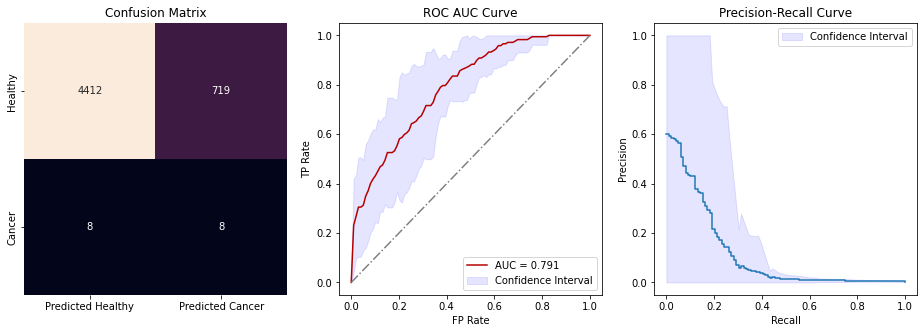

In [ ]:
cv_analytics_util.get_cv_report();
cv_analytics_util.display_graph()

In [ ]:
# thresholds = []
# for analytics_util in cv_analytics_util.analytics_utils:
#     thresholds.append(analytics_util.get_report_generation_util().get_roc_threshold())

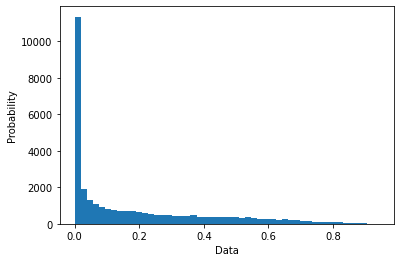

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(X_test_mismatch[f'{label}_prob'], density=False, bins=50)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');



In [ ]:
# for filesuffix in experiment_names:
#     print(filesuffix)
#     load_cv_analytics_util_see_stats(filesuffix)